In [1]:
# Helper packages
import numpy as np
import pandas as pd
from plotnine import *
from scipy.stats import uniform
from scipy.stats import randint

# Modeling packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import partial_dependence
from sklearn.pipeline import Pipeline

In [2]:
# read the data
music_df = pd.read_csv('../data/music_dataset_cleaned.csv')
music_df.Class = music_df.Class.astype(str)

# create train/test split
class_col = music_df.Class
music_train, music_test = train_test_split(music_df, train_size=0.7, random_state=123, stratify=class_col)

In [3]:
# separate features from labels and only use numeric features
x_train = music_train.drop("Class", axis=1)
y_train = music_train[["Class"]]    

# separate features from labels and only use numeric features
x_test = music_test.drop("Class", axis=1)
y_test = music_test[["Class"]]    

In [4]:
y_train.head()

,Class
5086,9
369,6
5900,0
1036,10
11452,7


In [ ]:
x_train.shape

In [19]:
model = RandomForestClassifier(n_estimators=30)
model_fit = model.fit(x_train[["speechiness", "loudness", "energy", "duration_in min/ms"]],y_train.values.ravel())

In [20]:
model.score(x_test[["speechiness", "loudness", "energy", "duration_in min/ms"]],y_test.values.ravel())

0.3621040933506205

In [13]:
y_pred = model.predict(x_test[["speechiness", "loudness", "energy", "duration_in min/ms"]])

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 92,   0,   6,   0,  35,  20,   0,   0,  22,   0,  12],
       [  0,   4, 178,  14,   0,   0,  18, 143,   0,  13,  42],
       [ 14,  75, 740,  68,  11,   7,  25, 192,   0, 196, 157],
       [  0,   6, 175,  50,   0,   0,  19,  45,   0,  20,  67],
       [ 32,   0,   5,   0,  55,   8,   0,   0,   5,   0,  16],
       [ 26,   0,   2,   0,   2,  42,   0,   0,   3,   0,  41],
       [  0,   3,  43,  12,   0,   0, 269,  31,   0,   7,  69],
       [  0, 130, 329,  35,   0,   0,  36, 114,   0,  26, 106],
       [ 15,   0,   0,   0,   7,   2,   0,   0, 148,   0,   1],
       [  0,   4, 281,  10,   0,   0,   5,  28,   0, 220,   8],
       [ 18,  21, 245,  29,  11,  22,  61,  81,   1,  11, 257]])

Text(69.0, 0.5, 'Truth')

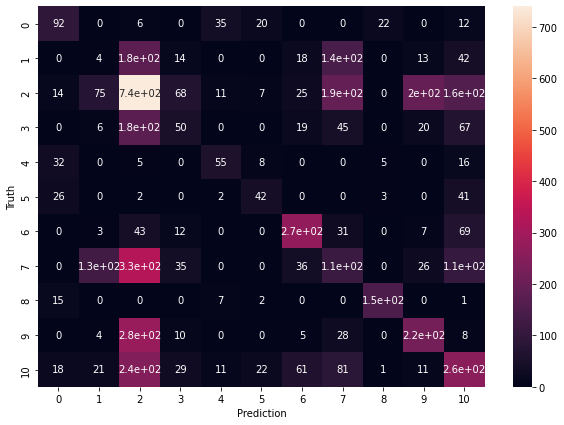

In [16]:
import matplotlib.pyplot as plt
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')